# $\color{green}{\text{Social Graphs Explainer Notebook}}$

## $\color{green}{\text{1. Motivation}}$

###  $\color{green}{\text{1.1  Dataset}}$
In this project the dataset includes several different kinds of characters from Greek mythology. The data was extracted from this [Fandom page](https://mythus.fandom.com/wiki/Category:Greek_mythology) which contains content of figures, deities(gods), creatures, heroes, and many more. 

The different figures, people, deities etc has their own node. Inbetween different characters, as for example the two gods Zeus and Hera, there exist a link from Hera's web page to Zeus' web page. 

Each character has their own text assigned to them. The texts contains everything from the family tree of that character to enemies and brave histories. 


###  $\color{green}{\text{1.2 Why this Dataset?}}$
Greek mythology is broadly known as an old, ancient and religious subject. After looking at different topics we understood there was more to the Greek gods and godesses than we first thougth which made us interested in learning more. All three of us knew of some Greek histories or characters from before but we did not know too much about the relations between them. What sentiments the characters and different communities have were also unkown but very compelling. Are the gods all angry, happy or just very romantic? 

Now, we proudly represent our notebook with interesting data analysis, sentiment analysis, text extrations, WordClouds, easy-to-read plots and more to show users of this page what Greek mythology is really all about. 


###  $\color{green}{\text{1.3 Goal for you as an user}}$

Greek mythology consists of tales and stories which are very dramatic and contain partnerships, intrigues and large family trees. The goal for this project is to give users a broader understanding on what greek mythology is about and what caracteristics it has. Maybe the next time you see the movies Hercules, Heracles in greek, or Troja you recognise the main topics of Greek mythology. 


## $\color{green}{\text{2. Basic Statistics}}$

### $\color{green}{\text{2.1 Data Cleaning and Processing}}$

- Firstly, the different web pages for the different characteres were examined. By looking at the Fandom API the different pages for the different characters were downloaded. After examining the different species in greek mythology it was decided to look into deities(gods), godesses, creatures, figures, heroes, peoples, personifictaions, cyclopes, mortals, stubs and titans. 
- Secondly, there were made a dataframe containing all the different characters with their title, what speicies they are, consorts, children, enemies and links. There is a total of 451 nodes with 2537 links. The characters that did not have any links to their site or links to other characters' sites were removed from the dataframe. These changes were done on the stubs category.
- By using the dataframe the text files for the characters were extracted and downloaded. Both the raw text(with titles, links, numbers etc) and later on the clean text were saved locally with file titles as the characters name. These text files makes up the network. If for example Zeus mentions his sister Hera, and Hera is referring to another site, there is added an edge between the two. Addiotionally, it was checked whether the link was in the dataframe. If the link was not in the dataframe it was discarded.
- After getting all the characters, their texts and their links the Giant Connected Component (GCC) was plotted. The characters, nodes, is given different colours to make it more visually pretty and there is added edges inbetween to see which characters has links to which. The `ForceAtlas2` algorithm was used when plotting the GCC to make positions of the nodes and links more understandable. 

Here follows a tutorial for how the data was extracted from the [Fandom Page](https://mythus.fandom.com/wiki/Category:Greek_mythology). 

In [2]:
import math
import re
import json
import unidecode
import requests
import urllib.parse
from bs4 import BeautifulSoup
import os

In [3]:
import urllib.request as urllib2
response = urllib2.urlopen("https://mythus.fandom.com/wiki/Category:Greek_mythology")
html = response.read()

In [4]:
print()
print ("GODS")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Greek_gods"
limit = "cmlimit=500"
import requests

print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r_gods = requests.get(url, allow_redirects=True)
with open('gods.json', 'wb') as f:
    f.write(r_gods.content)
    f.close()

print()
print ("GODDESSES")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Greek_goddesses"
limit = "cmlimit=500"
import requests

print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r_goddesses = requests.get(url, allow_redirects=True)
with open('goddesses.json', 'wb') as f:
    f.write(r_goddesses.content)
    f.close()    

print()
print ("CREATURES")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Greek_creatures"
limit = "cmlimit=500"

print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('creatures.json', 'wb') as f:
    f.write(r.content)
    f.close()

print()
print ("FIGURES")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Greek_figures"
limit = "cmlimit=500"
import requests

print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('figures.json', 'wb') as f:
    f.write(r.content)
    f.close()

    
print()
print ("HEROES")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Greek_heroes"
limit = "cmlimit=500"
import requests

print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('heroes.json', 'wb') as f:
    f.write(r.content)
    f.close()
    
# ITEMS SKIPPED
# LOCATIONS SKIPPED

print()
print ("PEOPLES")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Peoples_in_Greek_mythology"
limit = "cmlimit=500"
import requests

print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('peoples.json', 'wb') as f:
    f.write(r.content)
    f.close()
    

print()
print ("PERSONIFICATIONS")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Personifications_in_Greek_mythology"
limit = "cmlimit=500"
print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('personifications.json', 'wb') as f:
    f.write(r.content)
    f.close()
    

print()
print ("CYCLOPES")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Cyclopes"
limit = "cmlimit=500"
print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('cyclopes.json', 'wb') as f:
    f.write(r.content)
    f.close()
    

print()
print ("MORTALS")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Mortals_from_Greek_myths"
limit = "cmlimit=500"
print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('mortals.json', 'wb') as f:
    f.write(r.content)
    f.close()

print()
print ("STUBS")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Stubs"
limit = "cmlimit=500"
print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('stubs.json', 'wb') as f:
    f.write(r.content)
    f.close()
    

print()
print ("TITANS")
# https://zelda.fandom.com/api.php
baseurl = "https://mythus.fandom.com/api.php?"
# rvslots = "rvslots=*"
action = "action=query"
listt = "list=categorymembers"
# content = "prop=revisions&rvprop=content"
dataformat = "format=json"
title = "cmtitle=Category:Titans"
limit = "cmlimit=500"
print()
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('titans.json', 'wb') as f:
    f.write(r.content)
    f.close()
    


GODS

https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_gods&cmlimit=500&format=json

GODDESSES

https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_goddesses&cmlimit=500&format=json

CREATURES

https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_creatures&cmlimit=500&format=json

FIGURES

https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_figures&cmlimit=500&format=json

HEROES

https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_heroes&cmlimit=500&format=json

PEOPLES

https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Peoples_in_Greek_mythology&cmlimit=500&format=json

PERSONIFICATIONS

https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Personifications_in_Greek_mythology&cmlimit=500&format=json

CYCLOPES

https://mythus

In [5]:
def js_r(filename: str):
    with open(filename) as f_in:
        return json.load(f_in)
    
filename = 'creatures.json'
d = js_r(filename)
creatures = d['query']['categorymembers']

filename = 'cyclopes.json'
d = js_r(filename)
cyclopes = d['query']['categorymembers']

filename = 'gods.json'
d = js_r(filename)
gods = d['query']['categorymembers']

filename = 'goddesses.json'
d = js_r(filename)
goddesses = d['query']['categorymembers']

filename = 'figures.json'
d = js_r(filename)
figures = d['query']['categorymembers']

filename = 'heroes.json'
d = js_r(filename)
heroes = d['query']['categorymembers']

filename = 'mortals.json'
d = js_r(filename)
mortals = d['query']['categorymembers']

filename = 'peoples.json'
d = js_r(filename)
peoples = d['query']['categorymembers']

filename = 'personifications.json'
d = js_r(filename)
personifications = d['query']['categorymembers']

filename = 'stubs.json'
d = js_r(filename)
stubs = d['query']['categorymembers']

filename = 'titans.json'
d = js_r(filename)
titans = d['query']['categorymembers']

In [6]:
print()
print("PANDAS DATAFRAME")
print()
import pandas as pd
characters = pd.DataFrame(columns=['Name', 'Category'])

for entry in creatures[1:]:
    characters = characters.append({'Name': entry['title'], 'Category': 'Creature'}, ignore_index=True)
for entry in cyclopes:
    characters = characters.append({'Name': entry['title'], 'Category': 'Cyclope'}, ignore_index=True)
for entry in gods:
    characters = characters.append({'Name': entry['title'], 'Category': 'God'}, ignore_index=True)
for entry in goddesses:
    characters = characters.append({'Name': entry['title'], 'Category': 'Goddess'}, ignore_index=True)
for entry in figures:
    characters = characters.append({'Name': entry['title'], 'Category': 'Figure'}, ignore_index=True)
for entry in heroes:
    characters = characters.append({'Name': entry['title'], 'Category': 'Heroe'}, ignore_index=True)
for entry in mortals:
    characters = characters.append({'Name': entry['title'], 'Category': 'Mortal'}, ignore_index=True)
for entry in peoples:
    characters = characters.append({'Name': entry['title'], 'Category': 'People'}, ignore_index=True)
for entry in personifications:
    characters = characters.append({'Name': entry['title'], 'Category': 'Personification'}, ignore_index=True)
#NOTE: Some characters belong to the stubs category (f ex Alcmene, mother of Heracles)
# DONE look at list(cat) and extract the relevant ones
for entry in stubs:
    characters = characters.append({'Name': entry['title'], 'Category': 'Stub'}, ignore_index=True)    
for entry in titans[1:]:
    characters = characters.append({'Name': entry['title'], 'Category': 'Titan'}, ignore_index=True)
characters['Name'] = characters['Name'].str.strip()
print("Initial length of the dataframe", len(characters))

# cat = characters[characters.Name.str.contains("Category")].Name
# list(cat)

characters = characters.drop(characters[characters.Name.str.contains("Category")].index).reset_index(drop = True)
# characters[characters.duplicated(subset=['Name'], keep=False)].sort_values(by='Name').tail(103)
characters.drop_duplicates(subset=['Name'], inplace = True, ignore_index = True, keep = 'last') #keep='first' by default
print("Without Category entries and duplicates: ", len(characters))


PANDAS DATAFRAME

Initial length of the dataframe 1145
Without Category entries and duplicates:  815


Importing and saving all characters' text in a file named after their title. 

In [7]:
import re
import unidecode
import json 
import requests
import urllib.parse

In [8]:
baseurl = "https://mythus.fandom.com/api.php?"
rvslots = "rvslots=*"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"
path_root = "./characters/"
#characters = []
def api_to_txt(x):
    filename = x.Name
    titlename = urllib.parse.quote(filename)
    # print(filename)
    title = "titles=" + titlename.replace(" ", "_")
    query = "%s%s&%s&%s&%s&%s" %(baseurl, action, rvslots, title, content, dataformat)
    r = requests.get(query)
    response = r.text
    response = urllib2.urlopen(query).read()
    response_string = response.decode('utf-8').encode().decode('unicode-escape')
    # redirect = re.findall(r'\#REDIRECT \[\[(.*?)\]\]', response_string)

    path = path_root + filename + ".txt"
    is_character = re.findall(r'Greek', response_string)
    if (is_character):
        text_file = open(path, "wb")
        text_file.write(response)
        text_file.close()
    # else:
    #     print(path + " was not added")

a = characters.apply(lambda x: api_to_txt(x), axis=1)
# print()

In [9]:
import os.path

def remove_from_dataframe(filename):
    path = "./characters/" + filename + ".txt"
    if os.path.isfile(path):
        return 1
    else:
        # print(filename, "does not exist")
        return 0
        
# characters.apply(lambda x: remove_from_dataframe(x), axis = 1)
characters = characters[characters['Name'].apply(remove_from_dataframe) != 0]
characters.reset_index(inplace = True, drop=True)
characters.is_copy = None #For the copy warning
characters

Name  Category
0        Amphisbaena  Creature
1    Calydonian Boar  Creature
2              Campe  Creature
3         Catoblepas  Creature
4            Centaur  Creature
..               ...       ...
540           Tethys     Titan
541            Theia     Titan
542           Themis     Titan
543    Titanic Muses     Titan
544           Uranus     Titan

[545 rows x 2 columns]

Extracting species, family, consorts etc

In [10]:
import numpy as np 
from os.path import exists

def get_species(x):
    node_filename = x.Name
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_species = r'Species \= (.*?)\\n'
    species_block = redirect = re.findall(pattern_species, node_description)
    
    if not species_block:
        species_block = no_match
        species = species_block
        
    else:
        species_search = r'\[\[(.*?)\]\]'
        species = re.findall(species_search, species_block[0])
        species = [a.encode().decode('unicode-escape') for a in species]
        if not species:
            species = np.nan

    return species

# characters2 = characters.iloc[0:5]
characters["Species"] = characters.apply(lambda x: get_species(x), axis=1)
# list(characters.Species.dropna().values)


def get_siblings(x):
    node_filename = x.Name
#     print(node_filename)
#     print('characters/' + node_filename + '.txt')
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_siblings = r'Siblings \= (.*?)\\n'
    siblings_block = redirect = re.findall(pattern_siblings, node_description)
    
    if not siblings_block:
        siblings_block = no_match
        siblings = siblings_block
        
    else:
        siblings_search = r'\[\[(.*?)\]\]'
        siblings_list = re.findall(siblings_search, siblings_block[0])
        siblings = [a.encode().decode('unicode-escape') for a in siblings_list]
        if not siblings:
            siblings = np.nan

    return siblings
characters["Siblings"] = characters.apply(lambda x: get_siblings(x), axis=1)
# list(characters.Siblings.dropna().values)


def get_consorts(x):
    node_filename = x.Name
#     print(node_filename)
#     print('characters/' + node_filename + '.txt')
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_consorts = r'Consort \= (.*?)\\n'
    consorts_block = redirect = re.findall(pattern_consorts, node_description)
    
    if not consorts_block:
        consorts_block = no_match
        consorts = consorts_block
        
    else:
        consorts_search = r'\[\[(.*?)\]\]'
        consorts_list = re.findall(consorts_search, consorts_block[0])
        consorts = [re.sub(" *\\(.*", "", l) for l in consorts_list]
        consorts = [re.sub(" *\\|.*", "", l) for l in consorts]
        consorts = [a.encode().decode('unicode-escape') for a in consorts]
        if not consorts:
            consorts = np.nan

    return consorts

characters["Consorts"] = characters.apply(lambda x: get_consorts(x), axis=1)
# list(characters.Consorts.dropna().values)
# characters.Consorts.dropna()
# TODO REBROWSE ZEUS


def get_children(x):
    node_filename = x.Name
#     print(node_filename)
#     print('characters/' + node_filename + '.txt')
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_children = r'Children \= (.*?)\\n'
    children_block = redirect = re.findall(pattern_children, node_description)
    
    if not children_block:
        children_block = no_match
        children = children_block
        
    else:
        children_search = r'\[\[(.*?)\]\]'
        children_list = re.findall(children_search, children_block[0])
        children = [re.sub(" *\\(.*", "", l) for l in children_list]
        children = [re.sub(" *\\|.*", "", l) for l in children]
        children = [a.encode().decode('unicode-escape') for a in children]
        if not children:
            children = np.nan

    return children

characters["Children"] = characters.apply(lambda x: get_children(x), axis=1)
# list(characters.Children.dropna().values)
# characters.Children.dropna()


def get_enemies(x):
    node_filename = x.Name
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_enemies = r'Enemies \= (.*?)\\n'
    enemies_block = redirect = re.findall(pattern_enemies, node_description)
    
    if not enemies_block:
        enemies_block = no_match
        enemies = enemies_block
        
    else:
        enemies_search = r'\[\[(.*?)\]\]'
        enemies_list = re.findall(enemies_search, enemies_block[0])
        enemies = [re.sub(" *\\(.*", "", l) for l in enemies_list]
        enemies = [re.sub(" *\\|.*", "", l) for l in enemies]
        enemies = [a.encode().decode('unicode-escape') for a in enemies]
        if not enemies:
            enemies = np.nan

    return enemies

characters["Enemies"] = characters.apply(lambda x: get_enemies(x), axis=1)
# list(characters.Consorts.dropna().values)
# characters.Consorts.dropna()

at_least = characters.iloc[characters[['Species', 'Siblings', 'Consorts', 'Children']].dropna(thresh=1).index]

# at_least.head(15)
len(at_least)

107

In [11]:
def get_links_characters(node_filename, links_list):
    links_list = list(set(links_list))
    characters_links_list = []
    for i in range(len(links_list)):
        if links_list[i] in characters.Name.values:
            if not links_list[i] == node_filename:
                characters_links_list.append(links_list[i])
    return characters_links_list

def get_links(node_filename):
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()

    pattern = r'\[\[(.*?)\]\]'

    find = re.findall(pattern, node_description)
    all_links_list = find
    characters_links_list = get_links_characters(node_filename, all_links_list)
#     characters_links_list = all_links_list
    return characters_links_list

characters["Linked"] = characters.apply(lambda x: get_links(x.Name), axis=1)
characters.head(3)
# characters[characters["Category"] == "Stub"]
characters.Category.value_counts().keys()

Index(['Stub', 'Goddess', 'Mortal', 'Titan', 'God', 'Creature', 'People',
       'Personification', 'Figure', 'Heroe', 'Cyclope'],
      dtype='object')

Finding number of nodes and links

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re

def add_node_and_edges(net, node):
    net.add_node(node.Name, Category = node.Category, Species = node.Species)
    links = node.Linked
    if links: 
        for link in links:
            net.add_edge(node.Name, link)

import networkx as nx
import matplotlib.pyplot as plt

net = nx.DiGraph()
characters.apply(lambda x: add_node_and_edges(net, x), axis=1)
print("Number of isolated nodes (degree zero): ", len(list(nx.isolates(net)))) 

net.remove_nodes_from(list(nx.isolates(net)))
# plt.figure(3,figsize=(12,12)) 
# nx.draw(net, with_labels = True)
# plt.show()
# plt.savefig('characters_network.png')

print("Number of nodes: ", len(net.nodes()))
print("Number of links: ", len(net.edges()))

Number of isolated nodes (degree zero):  23
Number of nodes:  522
Number of links:  3707


A visualisation of the greek mythology dataset:

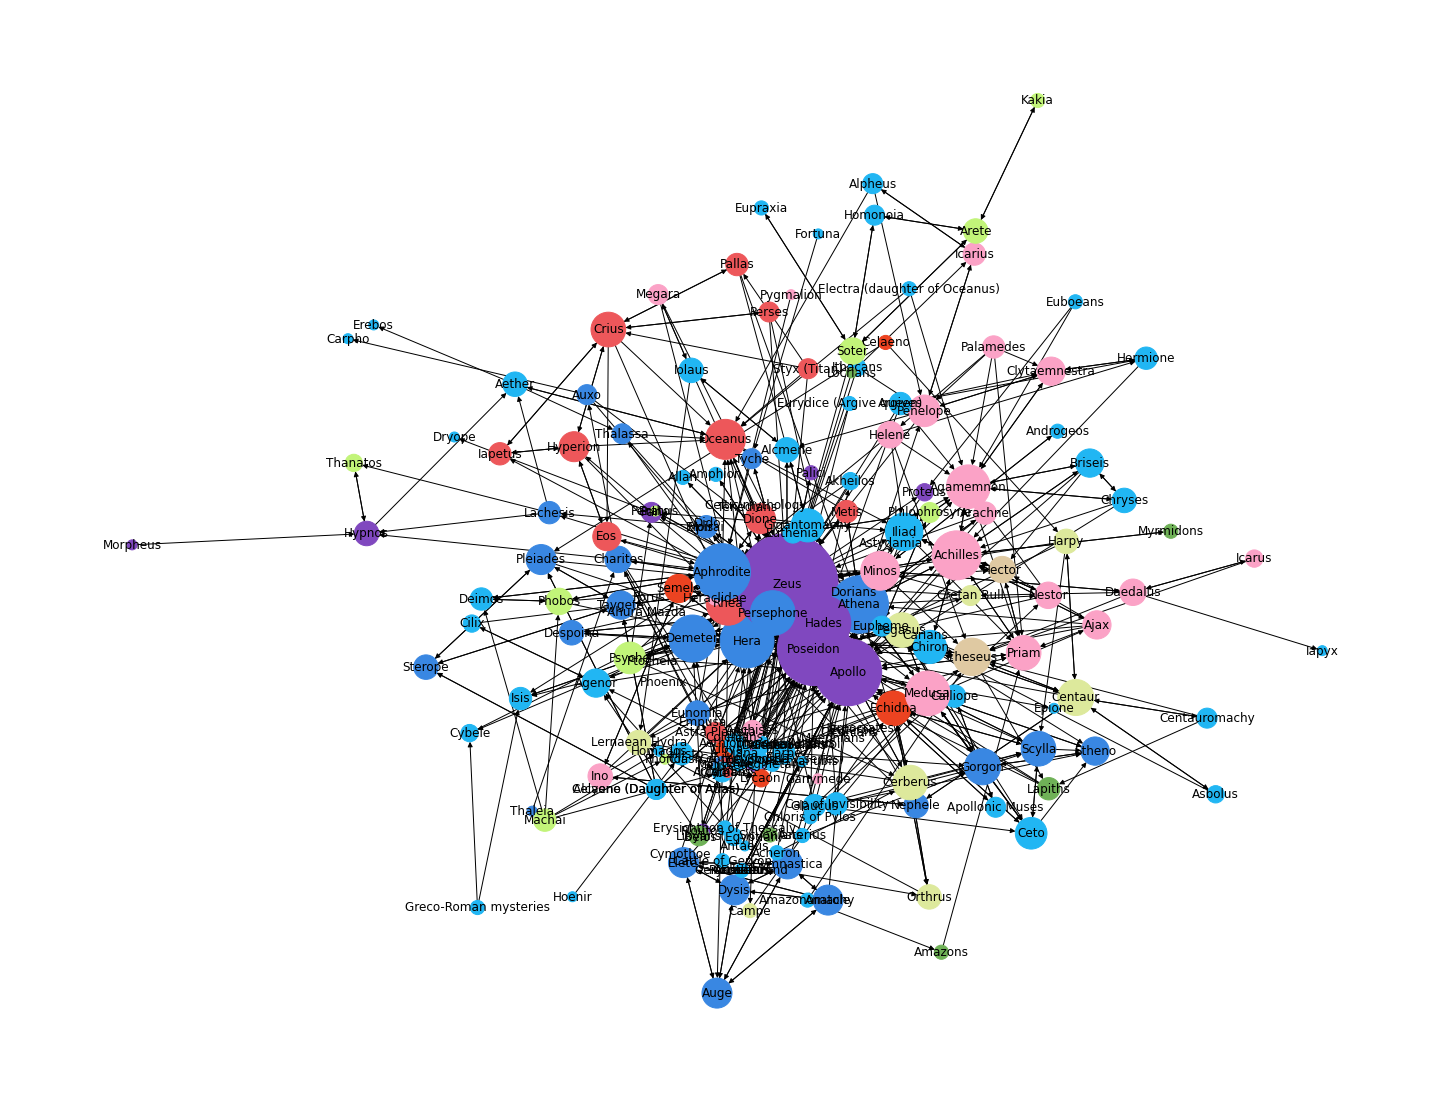

In [13]:
import random
k = 200
sampled_nodes = random.sample(net.nodes, k)
sampled_graph = net.subgraph(sampled_nodes)

def random_color():
    r = lambda: random.randint(0,255)
    return('#%02X%02X%02X' % (r(),r(),r()))

categories = list(characters.Category.value_counts().keys())
colors = [random_color() for i in range(len(categories))]

node_color_zip = zip(categories, colors)
node_color_map = dict(node_color_zip)
node_colors =  [node_color_map[sampled_graph.nodes[node]['Category']] for node in sampled_graph]

d = dict(nx.degree(sampled_graph))
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

fig = plt.figure(figsize = [20,15])
#plt.title('Greek Mythology Network', size=30)
nx.draw_kamada_kawai(sampled_graph, node_color = node_colors,  node_size=[v * 100 for v in d.values()], with_labels=True)
plt.savefig('greek_network.png')
plt.show()

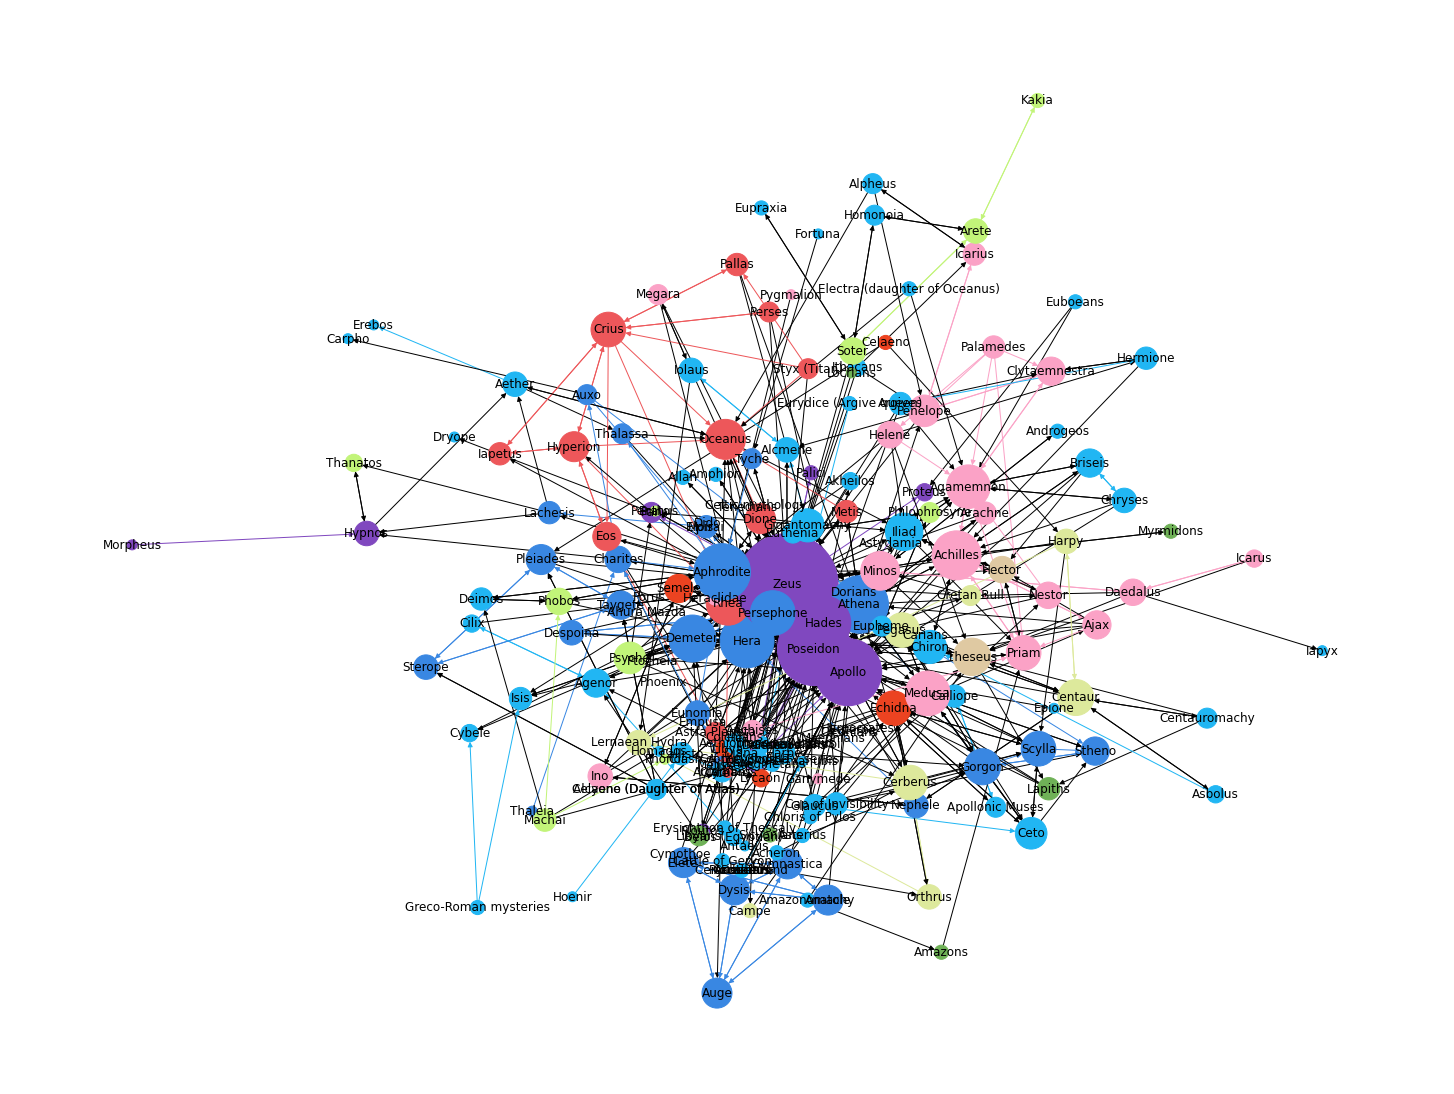

In [14]:
edge_color_map = node_color_map

def edge_color_get(G, edge): 
    if (G.nodes[edge[0]]['Category']) == (G.nodes[edge[1]]['Category']):
#         print('yes:', G_uni.nodes[edge[0]]['Role'], G_uni.nodes[edge[1]]['Role'])
        return  edge_color_map[G.nodes[edge[0]]['Category']]
    else:
#         print('no:', G_uni.nodes[edge[0]]['Role'], G_uni.nodes[edge[1]]['Role'])
        return '#000000'
edge_colors = [edge_color_get(sampled_graph, edge) for edge in sampled_graph.edges()]

fig = plt.figure(figsize = [20,15])
nx.draw_kamada_kawai(sampled_graph, node_color = node_colors, edge_color = edge_colors, node_size=[v * 100 for v in d.values()], with_labels=True)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 435.47it/s]


BarnesHut Approximation  took  0.25  seconds
Repulsion forces  took  0.81  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


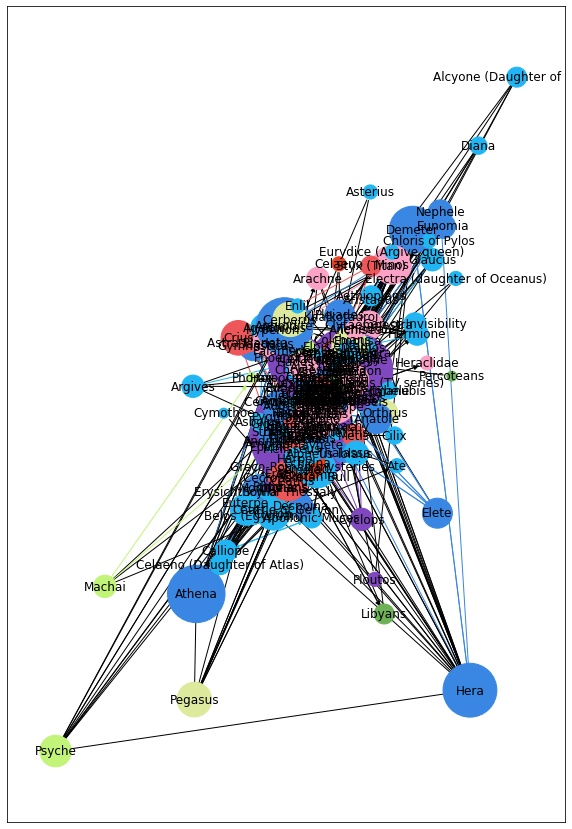

<Figure size 432x288 with 0 Axes>

In [15]:
from fa2 import ForceAtlas2
fig = plt.figure(figsize = [10,15])
fa = ForceAtlas2(outboundAttractionDistribution=True,
                 edgeWeightInfluence=5, gravity = 2000)
positions = fa.forceatlas2_networkx_layout(sampled_graph, pos=None, iterations=500)

import numpy as np
nx.draw_networkx_edges(sampled_graph, pos=positions, edge_color = edge_colors)
nx.draw_networkx_nodes(sampled_graph, pos=positions, node_color = node_colors,  node_size=[v * 100for v in d.values()])

# labels_draw = ['Link', 'Calamity Ganon', 'Hylia']
# labels = {}    
# for node in G.nodes():
#     if node in labels_draw:
#         labels[node] = node
# nx.draw_networkx_labels(sampled_graph, pos=positions, font_size = 12, labels = labels)
nx.draw_networkx_labels(sampled_graph, pos=positions, font_size = 12)


# plt.axis('off')
plt.show()
plt.savefig('FA.png')
# plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 187.44it/s]


BarnesHut Approximation  took  0.23  seconds
Repulsion forces  took  0.77  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


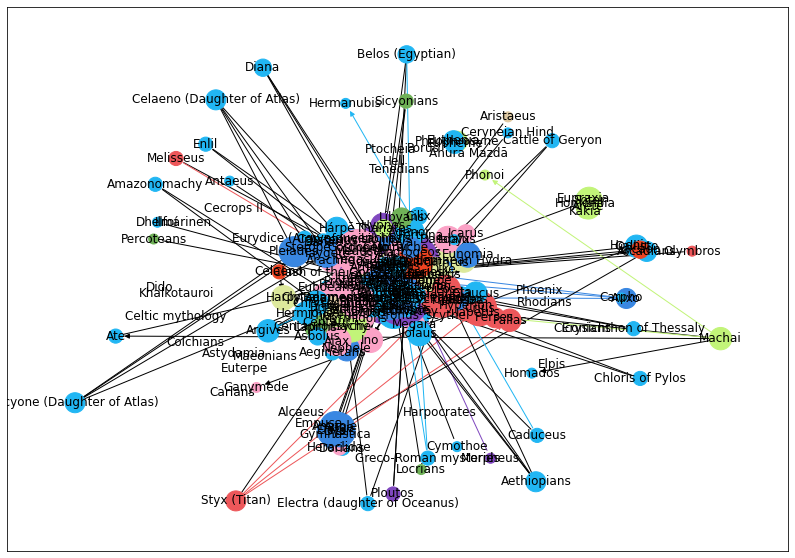

Number of isolated nodes (degree zero):  22


<Figure size 432x288 with 0 Axes>

In [16]:
from fa2 import ForceAtlas2
fig = plt.figure(figsize = [14,10])
fa = ForceAtlas2(outboundAttractionDistribution=False,
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0)


positions = fa.forceatlas2_networkx_layout(sampled_graph, pos=None, iterations=200)
import numpy as np
nx.draw_networkx_edges(sampled_graph, pos=positions, edge_color = edge_colors)
nx.draw_networkx_nodes(sampled_graph, pos=positions, node_color = node_colors,  node_size=[v * 100 for v in d.values()])
# nx.draw_networkx_labels(sampled_graph, pos=positions, font_size = 12, labels = labels)
nx.draw_networkx_labels(sampled_graph, pos=positions, font_size = 12)

# plt.axis('off')
plt.show()
plt.savefig('FA2.png')
# plt.show()
print("Number of isolated nodes (degree zero): ", len(list(nx.isolates(sampled_graph))))

In [17]:
#The top connected character in greek mythology. i.e. find the node with the highest in-degree
in_degree = sorted(net.in_degree, key=lambda x: x[1], reverse=True)
in_degree[0]

#This is not surprising since Zeus is the biggest name in Greek Mythology, which we already knew.. This means that other 
#character pages mention him. 

print("This is not surprising since Zeus is the biggest name in Greek Mythology, which we already knew.. This means that other character pages mention him")

out_degree = sorted(net.out_degree, key=lambda x: x[1], reverse=True)
out_degree[0]

#Zeus also has the top out degree, which means that he mentions most peope in his page. 


#Top five connected characters in regards to their in degree
for i in range(5):
    print(in_degree[i])
    
#Top five connected characters in regards to their out degree
for i in range(5):
    print(out_degree[i])
#Compute TC for each category (how many times a word appears in each characters category page files)

#All categories
cat_keys = characters.Category.value_counts().keys().tolist()
cat_keys

#Get all characters under each category
mortals = at_least.loc[at_least['Category'] == 'Mortal','Name']
peoples = at_least.loc[at_least['Category'] == 'People','Name']
titans = at_least.loc[at_least['Category'] == 'Titan','Name']
creatures = at_least.loc[at_least['Category'] == 'Creature','Name']
gods = at_least.loc[at_least['Category'] == 'God','Name']
goddess = at_least.loc[at_least['Category'] == 'Goddess','Name']
figures = at_least.loc[at_least['Category'] == 'Figure','Name']
personifications = at_least.loc[at_least['Category'] == 'Personification','Name']
heroes = at_least.loc[at_least['Category'] == 'Heroe','Name']
cyclopes = at_least.loc[at_least['Category'] == 'Cyclope','Name']
gods



This is not surprising since Zeus is the biggest name in Greek Mythology, which we already knew.. This means that other character pages mention him
('Zeus', 163)
('Poseidon', 89)
('Heracles', 84)
('Apollo', 84)
('Troy', 63)
('Zeus', 96)
('Heracles', 64)
('Daemon', 40)
('Apollo', 36)
('Hera', 33)


37        Adonis
39        Apollo
40          Ares
42       Chronus
44      Dionysus
45          Eros
46         Hades
48    Hephaestus
49        Hermes
52        Mithra
55        Nereus
59           Pan
62      Poseidon
65      Tartarus
66       Thaumas
67        Triton
68        Typhon
70      Zephyrus
71          Zeus
Name: Name, dtype: object

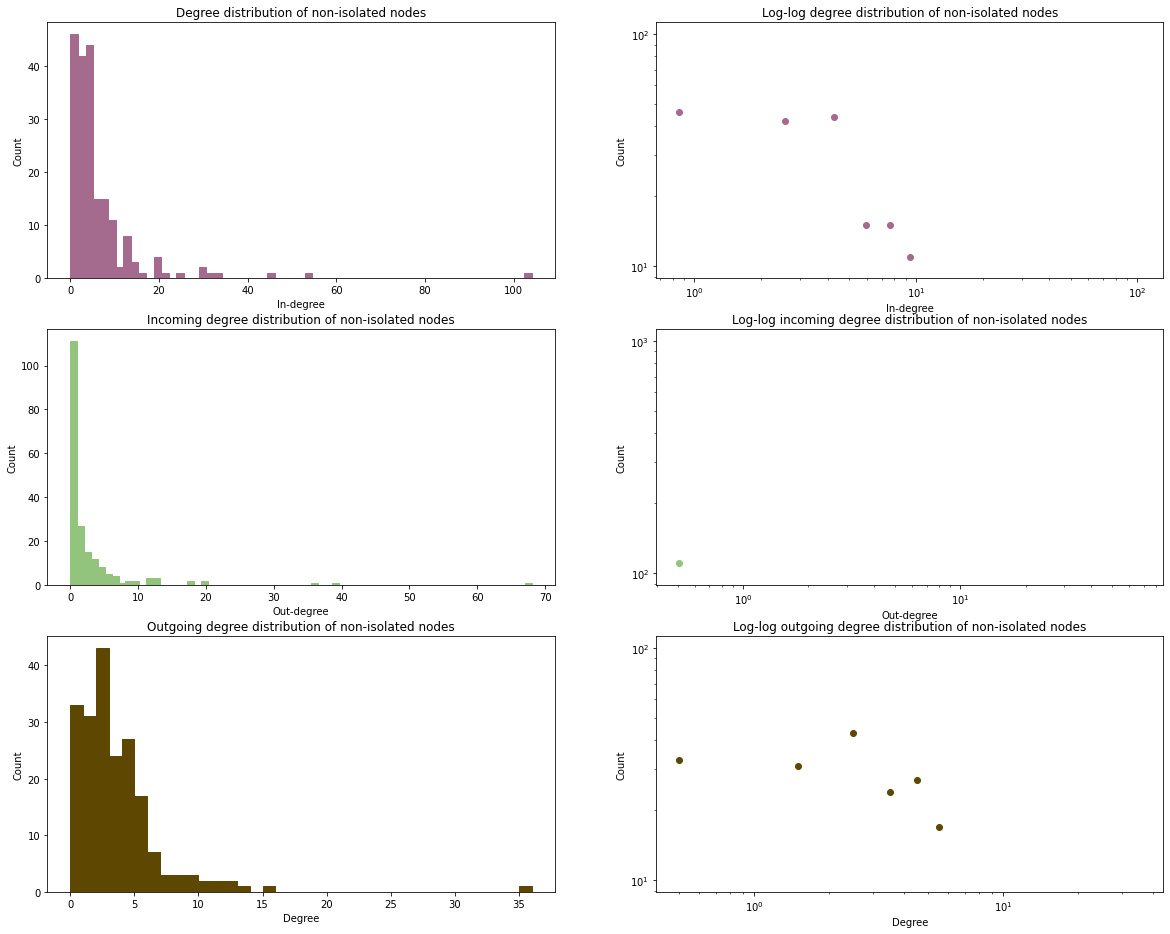

In [18]:
G_dir = sampled_graph

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(20, 16)

degrees = sorted(G_dir.degree(G_dir.nodes, weight=None), key=lambda x: x[1], reverse = True)
degrees_dist = [tuples[1] for tuples in degrees] #always >0 because we already removed the isolated nodes
hist_degree, bins =  np.histogram(degrees_dist, bins = 'auto')
bins_plot = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

axs[0,0].hist(degrees_dist, bins='auto', color='#a56b8e', edgecolor ='#a56b8e')
axs[0,0].set_title('Degree distribution of non-isolated nodes')
axs[0,0].set_xlabel('In-degree')
axs[0,0].set_ylabel('Count')
axs[0,1].scatter(bins_plot,hist_degree, color = '#a56b8e')
axs[0,1].set_yscale("log")
axs[0,1].set_xscale("log")
axs[0,1].set_title('Log-log degree distribution of non-isolated nodes')
axs[0,1].set_xlabel('In-degree')
axs[0,1].set_ylabel('Count')

in_degrees = sorted(G_dir.in_degree(G_dir.nodes, weight=None), key=lambda x: x[1], reverse = True)
in_degrees_dist = [tuples[1] for tuples in in_degrees]
hist_in_degree, bins =  np.histogram(in_degrees_dist, bins = 'auto')
bins_plot_in = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

axs[1,0].hist(in_degrees_dist, bins='auto', color='#93c47d', edgecolor ='#93c47d')
axs[1,0].set_title('Incoming degree distribution of non-isolated nodes')
axs[1,0].set_xlabel('Out-degree')
axs[1,0].set_ylabel('Count')
axs[1,1].scatter(bins_plot_in,hist_in_degree, color = '#93c47d')
axs[1,1].set_yscale("log")
axs[1,1].set_xscale("log")
axs[1,1].set_title('Log-log incoming degree distribution of non-isolated nodes')
axs[1,1].set_xlabel('Out-degree')
axs[1,1].set_ylabel('Count')


out_degrees = sorted(G_dir.out_degree(G_dir.nodes, weight=None), key=lambda x: x[1], reverse = True)
out_degrees_dist = [tuples[1] for tuples in out_degrees]
hist_out_degree, bins =  np.histogram(out_degrees_dist, bins = 'auto')
bins_plot_out = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

axs[2,0].hist(out_degrees_dist, bins='auto', color='#5e4700', edgecolor ='#5e4700')
axs[2,0].set_title('Outgoing degree distribution of non-isolated nodes')
axs[2,0].set_xlabel('Degree')
axs[2,0].set_ylabel('Count')
axs[2,1].scatter(bins_plot_out,hist_out_degree, color = '#5e4700')
axs[2,1].set_yscale("log")
axs[2,1].set_xscale("log")
axs[2,1].set_title('Log-log outgoing degree distribution of non-isolated nodes')
axs[2,1].set_xlabel('Degree')
axs[2,1].set_ylabel('Count')

plt.savefig('dist.png')
plt.show()

Calculating best minimal value for power law fit
alpha:  2.2757511969469477
Calculating best minimal value for power law fit
alpha:  3.1044871750467267
Calculating best minimal value for power law fit
alpha:  2.434091510153584


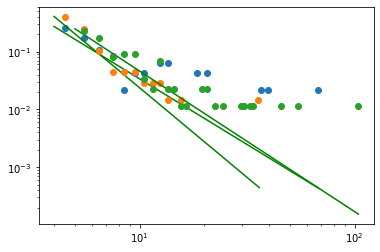

In [19]:
import powerlaw

def fit_plot_powerlaw(G, deg):
    if deg == "total":
        degrees = (list(dict(G.degree()).values()))
    elif deg == "in_degree":
        degrees = (list(dict(G.in_degree()).values()))
    else:
        degrees = (list(dict(G.out_degree()).values()))
        
    while 0 in degrees:
        degrees.remove(0)
    pfit = powerlaw.Fit(degrees, discrete=True)
    print("alpha: ", pfit.alpha)
    pfit.power_law.plot_pdf(color='g', label='Power law fit')
    pfit.plot_pdf(marker='o', linewidth=0, linear_bins=True)
    
fit_plot_powerlaw(G_dir, deg="in_degree")
fit_plot_powerlaw(G_dir, deg="out_degree")
fit_plot_powerlaw(G_dir, deg="total")

## $\color{green}{\text{3. Tools, theory and analysis}}$

###  $\color{green}{\text{3.1 Working with the text}}$
- To work with the characters text from the Fandom site it was necessary to use regular expressions to substract unnessecary words. Regex was also used to find links between characters, family relations and special part of the text. 
- Language processing as removing stopwords(yes, no, it, is, etc) was done by importing stopwords from the wordcloud package
- To ensure that the next part of the code runs succeedingly the user must make the files as follows: god, figure, creature, titan, people, mortal. In these files there will be saved a belonging text to that species type

###  $\color{green}{\text{3.2 Network science tools and data analysis strategies}}$

###  $\color{green}{\text{3.3 Understanding the Dataset}}$
The data analysis strategies in this project is to look at the WordClouds for different species, find the communities of the network and the sentiments belonging to the different communities. 
- WordClouds on different species
    - What characterise the different species?
    - What are the most repeated words and how can that relate to that species?
- Communities
    - What communities are made? And do they correspond to the species?
- Sentiment analysis
    - What are the sentiments of the different communities?
    - Are the sentiments reasonable according to the different species?


###  $\color{green}{\text{3.4 Word Clouds}}$

In [20]:
import json
import nltk
import regex as re
import os
import numpy as np
import urllib.request
import json
import requests
import pandas as pd
import nltk
import regex as re
import os
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
stopwords = STOPWORDS

characters.Category.value_counts()

Stub               224
Goddess             66
Mortal              58
Titan               42
God                 35
Creature            35
People              28
Personification     22
Figure              20
Heroe               13
Cyclope              2
Name: Category, dtype: int64

Patterns to remove stopwords, special signs and other

In [21]:
removes_n = r"\\n"
removes_intro = "\"(.*?)\"\:"
removes_categories = r"\[\[category:\w.*\}"
removes_signs = "[^\w\s]"
removes_numbers = "\d"
removes_titles =r"\\n\|\w(.*?)\="
removes_trivials = r"\\n\\n\=\=\w(.*?)\=\=\\n"
removes_links = "(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)"
removes_latin = r"latin\=\w(.*?)\\n"
removes_s = "\ss\s"
removes_ufs = r"\\u(?<=u)\d..."


In [22]:
import os
# iterate over all filens in the character folder to clean their text and save in character_clean
filenames = []
for file in os.listdir("./characters/"):
    filename = os.fsdecode(file)
    if filename.endswith( ('.txt') ): # only txt files
        filenames.append(filename)
filenames.sort() # filenames

In [26]:
#without/with names
removable_words = ['jpg', 'wikipedia', 'infobox', 'download', 'gallery','latin', 'figure', 'mortals','references', 'ref', 'god', 'creature','greek']
save_path = './characters_clean/'
for file in os.listdir("./characters/"):
    if os.path.isfile(file):
        with open ("./characters/" + file) as f:
            lines = f.readlines()
            lines = ''.join(lines)
            for name in characters['Name']: #delete hashtag to remove names
                   lines = re.sub(name,'',lines)
            lines = lines.lower()
            lines = re.sub(removes_ufs, '', lines)
            lines = re.sub(removes_categories, '', lines)
            lines = re.sub(removes_titles, '', lines)
            lines = re.sub(removes_trivials, '', lines)
            lines = re.sub(removes_links, '', lines)
            lines = re.sub(removes_latin, '', lines)
            lines = re.sub(removes_intro, '', lines)
            lines = re.sub(removes_n, '', lines)
            lines = re.sub(removes_numbers, '', lines)
            lines = re.sub(removes_signs, ' ', lines)
            for word in removable_words:
                lines = re.sub(word, '', lines)
            lines = re.sub(removes_s, '', lines)
            path = save_path + file
            text_file = open(path, "w") #save the files in an other folder - characters_clean
            text_file.write(lines)
            text_file.close()

print("Text file for Gods")

Text file for Gods


In [24]:

Gods = characters['Category'] == 'God'
Gods = characters[Gods]
Name_gods = Gods['Name']
#Gods
Name_gods
path_god = "./god/"
lines_gods = []
for files in os.listdir("./characters_clean/"):
    for names in Name_gods:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_gods.append(f.readlines())

lines_gods = ''.join(str(elem) for elem in lines_gods)
lines_gods = re.sub(removes_signs, '', lines_gods)
path = path_god +"gods_text.txt"
text_file = open(path, "w") #save the files in an other folder - characters_clean
text_file.write(lines_gods)
text_file.close()
print("Text file for Creatures")

Text file for Creatures


In [142]:
Goddess = characters['Category'] == 'Goddess'
Goddess = characters[Goddess]
Name_goddess = Goddess['Name']
#Goddess
Name_goddess
path_goddess = "./goddess/"
lines_goddess = []
for files in os.listdir("./characters_clean/"):
    for names in Name_goddess:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_goddess.append(f.readlines())

lines_goddess = ''.join(str(elem) for elem in lines_goddess)
lines_goddess = re.sub(removes_signs, '', lines_goddess)
path = path_goddess +"goddess_text.txt"
text_file = open(path, "w") #save the files in an other folder - characters_clean
text_file.write(lines_goddess)
text_file.close()
print("Text file for Gods")

Text file for Gods


In [143]:
Gods = characters['Category'] == 'God'
Gods = characters[Gods]
Name_gods = Gods['Name']
#Gods
Name_gods
path_god = "./god/"
lines_gods = []
for files in os.listdir("./characters_clean/"):
    for names in Name_gods:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_gods.append(f.readlines())

lines_gods = ''.join(str(elem) for elem in lines_gods)
lines_gods = re.sub(removes_signs, '', lines_gods)
path = path_god +"gods_text.txt"
text_file = open(path, "w") #save the files in an other folder - characters_clean
text_file.write(lines_gods)
text_file.close()
print("Text file for Creatures")

Text file for Creatures


In [144]:

Creatures = characters['Category'] == 'Creature'
Creatures = characters[Creatures]
Name_creature = Creatures['Name']

path_creature = "./creature/"
lines_creatures = []
for files in os.listdir("./characters_clean/"):
    for names in Name_creature:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_creatures.append(f.readlines())

lines_creatures = ''.join(str(elem) for elem in lines_creatures)
lines_creatures = re.sub(removes_signs, '', lines_creatures)
path = path_creature +"creatures_text.txt"
text_file = open(path, "w") #save the files in an other folder - characters_clean
text_file.write(lines_creatures)
text_file.close()
print("Text file for People")

Text file for People


In [145]:

People = characters['Category'] == 'People'
People = characters[People]
Name_people = People['Name']

path_people = "./people/"
lines_people = []
for files in os.listdir("./characters_clean/"):
    for names in Name_people:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_people.append(f.readlines())

lines_people = ''.join(str(elem) for elem in lines_people)
lines_people = re.sub(removes_signs, '', lines_people)
path = path_people +"people_text.txt"
text_file = open(path, "w") #save the files in an other folder - characters_clean
text_file.write(lines_people)
text_file.close()
print("Text file for Mortal")

Text file for Mortal


In [146]:

Mortal = characters['Category'] == 'Mortal'
Mortal = characters[Mortal]
Name_mortal = Mortal['Name']

path_mortal = "./mortal/"
lines_mortal = []
for files in os.listdir("./characters_clean/"):
    for names in Name_mortal:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_mortal.append(f.readlines())

lines_mortal = ''.join(str(elem) for elem in lines_mortal)
lines_mortal = re.sub(removes_signs, '', lines_mortal)
path = path_mortal +"mortal_text.txt"
text_file = open(path, "w") #save the files in an other folder - characters_clean
text_file.write(lines_mortal)
text_file.close()
print("Text file for Titans")

Text file for Titans


In [147]:

Titan = characters['Category'] == 'Titan'
Titan = characters[Titan]
Name_titan = Titan['Name']

path_titan  = "./titan/"
lines_titan = []
for files in os.listdir("./characters_clean/"):
    for names in Name_titan:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_titan.append(f.readlines())

lines_titan = ''.join(str(elem) for elem in lines_titan)
lines_titan = re.sub(removes_signs, '', lines_titan)
path = path_titan +"titan_text.txt"
text_file = open(path, "w") #save the files in an other folder - characters_clean
text_file.write(lines_titan)
text_file.close()



In [148]:
print("Plotting the five different Word Clouds for gods, people, creatures, mortals and titans")
wc = WordCloud(
    background_color = 'white',
    colormap='summer',
    stopwords = stopwords,
    height = 1400,
    width = 1000
)
all_lines = [lines_gods, lines_people,lines_creatures,lines_mortal, lines_titan]
titles = ["God's text", "Goddess' text","People's text", "Creature's text", "Mortal's text", "Titan's text"]
for alle in all_lines:
    if alle == lines_gods:
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[0])
        plt.axis("off")
        plt.show()
    if alle == lines_godess:
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[1])
        plt.axis("off")
        plt.show()
    if alle == lines_people:
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[2])
        plt.axis("off")
        plt.show()
    if alle == lines_creatures:
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[3])
        plt.axis("off")
        plt.show()
    if alle == lines_mortal:
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[4])
        plt.axis("off")
        plt.show()
    if alle == lines_titan:
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[5])
        plt.axis("off")
        plt.show()

Plotting the five different Word Clouds for gods, people, creatures, mortals and titans


ValueError: We need at least 1 word to plot a word cloud, got 0.

The five different WordClouds provides a good overview of what the gods, people, creatures, mortal and titans have in their text files. The gods clearly have one word in common - son. The people text have many familiar expressions as son, family and father. This gives an indication that the peoples text include many family relation. The creature text includes words as horse, centaur and sphinx which is not surprising since the text most likely descirbe what kind of species the creatuers are. In the WordCloud for the mortals three words stand out - son, king and troy. The Trojan war is a big event in the greek mythology which reflects the texts of the mortals. The word "titan" is the most repeated word of the titans, which is not very surprising but gaia - the godess of earth may also seem as a very important godess for the titans. 

###  $\color{green}{\text{3.5 Communities and TF-IDF}}$

Let's find communities and compute their associated TF-IDF 

In [ ]:
import community
G_undir = G_dir.to_undirected()
partition = community.best_partition(G_undir, randomize = False)
communities = list(set(partition.values()))


We find with this partition that there are 41 communities in total. The communities range from 0 to 41.

## $\color{green}{\text{4. Discussion}}$

The six different WordClouds shows the most frequent words for the different species. 
- The gods text has the words son and 

###  $\color{green}{\text{4.1 What went well?}}$
- The extraction of web sites, cleaning the text files, making the communities all went well. 
- Making the website was demanding but after all three project members contributed it finally suceeded


###  $\color{green}{\text{4.2 What is still missing?}}$
- Due to the small dataset from Fandom there was a need for additional texts to compare. 

###  $\color{green}{\text{4.3 What could be improved?}}$
- It can be discussed if the text cleaning should have gods names in it. It was concluded that the texts would make more sense without the characters names without them so all text files, which would be the different characters names, were removed from all text files. This leads to WordClouds without characters name which could be misleading due to the fact that for example the godess Hera mentions her brother Zeus a lot. 

## $\color{green}{\text{5. Contributions}}$

- Ana - Data analysis, data processing, sentiment analysis and webpage 
- Iris - Communities, TF-IDF, webpage
- Ruth - Webpage, Word Clouds, explainer notebook